In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.preprocessing import LabelEncoder

In [2]:
data_Train=pd.read_csv('SalaryData_Train.csv')
data_Test=pd.read_csv('SalaryData_Test.csv')

# Data cleaning

In [3]:
data_Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data_Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data_Train.groupby(['educationno']).count()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
educationno,,,,,,,,,,,,,
1,45,45,45,45,45,45,45,45,45,45,45,45,45
2,151,151,151,151,151,151,151,151,151,151,151,151,151
3,288,288,288,288,288,288,288,288,288,288,288,288,288
4,557,557,557,557,557,557,557,557,557,557,557,557,557
5,455,455,455,455,455,455,455,455,455,455,455,455,455
6,820,820,820,820,820,820,820,820,820,820,820,820,820
7,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048
8,377,377,377,377,377,377,377,377,377,377,377,377,377
9,9840,9840,9840,9840,9840,9840,9840,9840,9840,9840,9840,9840,9840


In [6]:
data_Train.groupby(['age']).count()
# there are 4 columns that should be conversted to categorical varibale
#age: capitalgain: capitalloss: hoursperweek

,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,,,,,,,,,,,,,
17,328,328,328,328,328,328,328,328,328,328,328,328,328
18,447,447,447,447,447,447,447,447,447,447,447,447,447
19,594,594,594,594,594,594,594,594,594,594,594,594,594
20,629,629,629,629,629,629,629,629,629,629,629,629,629
21,621,621,621,621,621,621,621,621,621,621,621,621,621
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,8,8,8,8,8,8,8,8,8,8,8,8,8
85,3,3,3,3,3,3,3,3,3,3,3,3,3
86,1,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
pd.crosstab(data_Train.education,data_Train.educationno)
#it can be seen that education and eduationno represents the same thing

educationno,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,820,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1048,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,377,0,0,0,0,0,0,0,0
1st-4th,0,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,288,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,557,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,455,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1008,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1307,0,0,0,0,0


In [8]:
data_Train= data_Train.drop('education',axis=1)
data_Test= data_Test.drop('education',axis=1)

# Data visualization

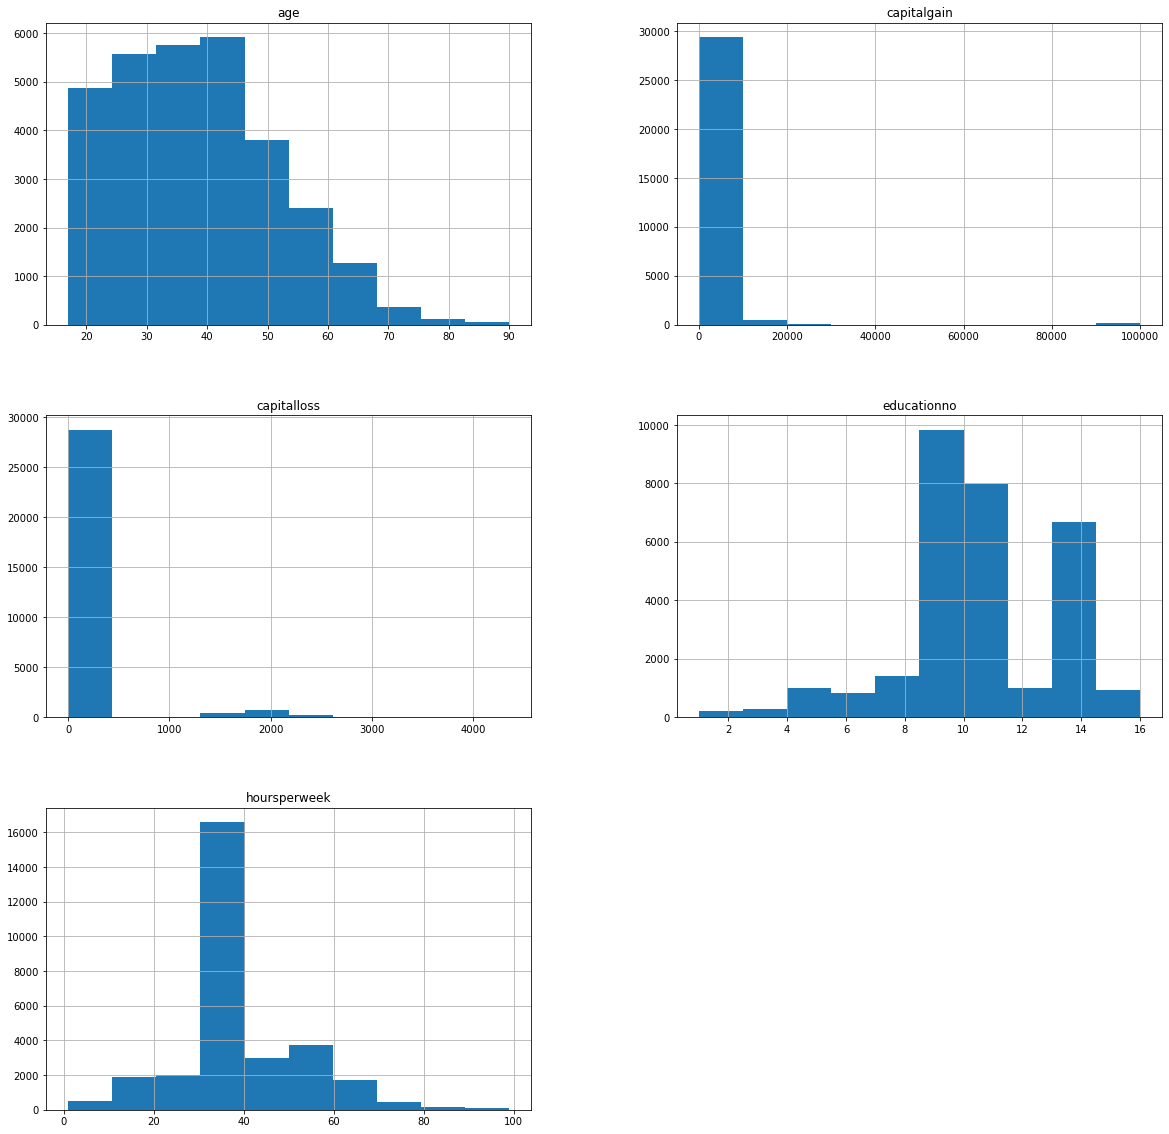

In [9]:
data_Train.hist(bins=10, figsize=(20,20))
plt.show()

In [10]:
data_Train[data_Train.capitalloss==0]
#out of 30000 data points 28735 have 0 capital gain
#divide this variable in 2 groups

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
data_Train[data_Train.capitalgain==0].shape
#out of 30000 data points 27623 have 0 capital loss
#divide this variable in 2 groups

(27623, 13)

In [12]:
data_Train[(data_Train.hoursperweek==40)].shape
#divide in three category category 

(14250, 13)

In [13]:
data_Train[data_Train.age<45].shape
#divide in two groups

(20716, 13)

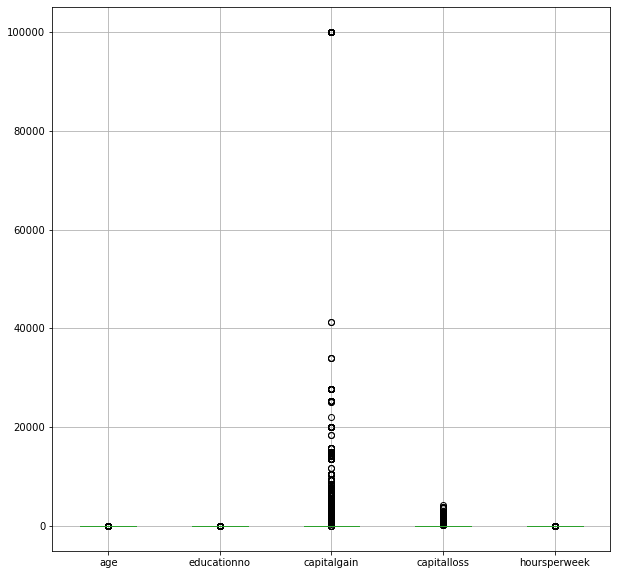

In [14]:
data_Train.boxplot(figsize=(10,10))
#capital gain and capital loss has outliers in the data 

# Data preprocessing

In [15]:
A=data_Train['capitalloss'].copy()
A[data_Train.capitalloss==0]=1
A[data_Train.capitalloss!=0]=2
data_Train['capitalloss']=A.copy()

In [16]:
B=data_Test['capitalloss'].copy()
B[data_Test.capitalloss==0]=1
B[data_Test.capitalloss!=0]=2
data_Test['capitalloss']=B.copy()

In [17]:
A=data_Train['capitalgain'].copy()
A[data_Train.capitalgain==0]=1
A[data_Train.capitalgain!=0]=2
data_Train['capitalgain']=A.copy()

In [18]:
B=data_Test['capitalgain'].copy()
B[data_Test.capitalgain==0]=1
B[data_Test.capitalgain!=0]=2
data_Test['capitalgain']=B.copy()

In [19]:
A=data_Train['hoursperweek'].copy()
A[data_Train['hoursperweek']<25]=1
A[(data_Train['hoursperweek']>=25)&(data_Train['hoursperweek']<65)]=2
A[data_Train['hoursperweek']>=65]=3
data_Train['hoursperweek']=A.copy()

In [20]:
B=data_Test['hoursperweek'].copy()
B[data_Test.hoursperweek<25]=1
B[(data_Test.hoursperweek>=25)&(data_Test.hoursperweek<65)]=2
B[data_Test.hoursperweek>=65]=3
data_Test['hoursperweek']=B.copy()

In [21]:
A=data_Train['age'].copy()
A[data_Train.age<=50]=1
A[data_Train.age>50]=2
data_Train['age']=A.copy()

In [22]:
B=data_Test['age'].copy()
B[data_Test.age<=50]=1
B[data_Test.age>50]=2
data_Test['age']=A.copy()

In [23]:
data_Train

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,1,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2,1,2,United-States,<=50K
1,1,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,1,1,United-States,<=50K
2,1,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1,1,2,United-States,<=50K
3,2,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1,1,2,United-States,<=50K
4,1,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1,1,2,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,1,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,1,1,2,United-States,<=50K
30157,1,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1,1,2,United-States,>50K
30158,2,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,1,1,2,United-States,<=50K
30159,1,Private,9,Never-married,Adm-clerical,Own-child,White,Male,1,1,1,United-States,<=50K


In [24]:
A=LabelEncoder()
data_Train['workclass']=A.fit_transform(data_Train['workclass'])
data_Train['maritalstatus']=A.fit_transform(data_Train['maritalstatus'])
data_Train['occupation']=A.fit_transform(data_Train['occupation'])
data_Train['relationship']=A.fit_transform(data_Train['relationship'])
data_Train['race']=A.fit_transform(data_Train['race'])
data_Train['sex']=A.fit_transform(data_Train['sex'])
data_Train['native']=A.fit_transform(data_Train['native'])
data_Train['Salary']=A.fit_transform(data_Train['Salary'])


In [25]:
data_Train

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,1,5,13,4,0,1,4,1,2,1,2,37,0
1,1,4,13,2,3,0,4,1,1,1,1,37,0
2,1,2,9,0,5,1,4,1,1,1,2,37,0
3,2,2,7,2,5,0,2,1,1,1,2,37,0
4,1,2,13,2,9,5,2,0,1,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,1,2,12,2,12,5,4,0,1,1,2,37,0
30157,1,2,9,2,6,0,4,1,1,1,2,37,1
30158,2,2,9,6,0,4,4,0,1,1,2,37,0
30159,1,2,9,4,0,3,4,1,1,1,1,37,0


# A>Transformation of categorical variable into label encoders and then checking the accuracy

In [26]:
A=LabelEncoder()
data_Test['workclass']=A.fit_transform(data_Test['workclass'])
data_Test['maritalstatus']=A.fit_transform(data_Test['maritalstatus'])
data_Test['occupation']=A.fit_transform(data_Test['occupation'])
data_Test['relationship']=A.fit_transform(data_Test['relationship'])
data_Test['race']=A.fit_transform(data_Test['race'])
data_Test['sex']=A.fit_transform(data_Test['sex'])
data_Test['native']=A.fit_transform(data_Test['native'])
data_Test['Salary']=A.fit_transform(data_Test['Salary'])

In [27]:
data_Test

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,1,2,7,4,6,3,2,1,1,1,2,37,0
1,1,2,9,2,4,0,4,1,1,1,2,37,0
2,1,1,12,2,10,0,4,1,1,1,2,37,1
3,2,2,10,2,6,0,2,1,2,1,2,37,1
4,1,2,6,4,7,1,4,1,1,1,2,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,1,2,13,4,9,3,4,1,1,1,2,37,0
15056,1,2,13,0,9,1,4,0,1,1,2,37,0
15057,2,2,13,2,9,0,4,1,1,1,2,37,0
15058,1,2,13,0,0,3,1,1,2,1,2,37,0


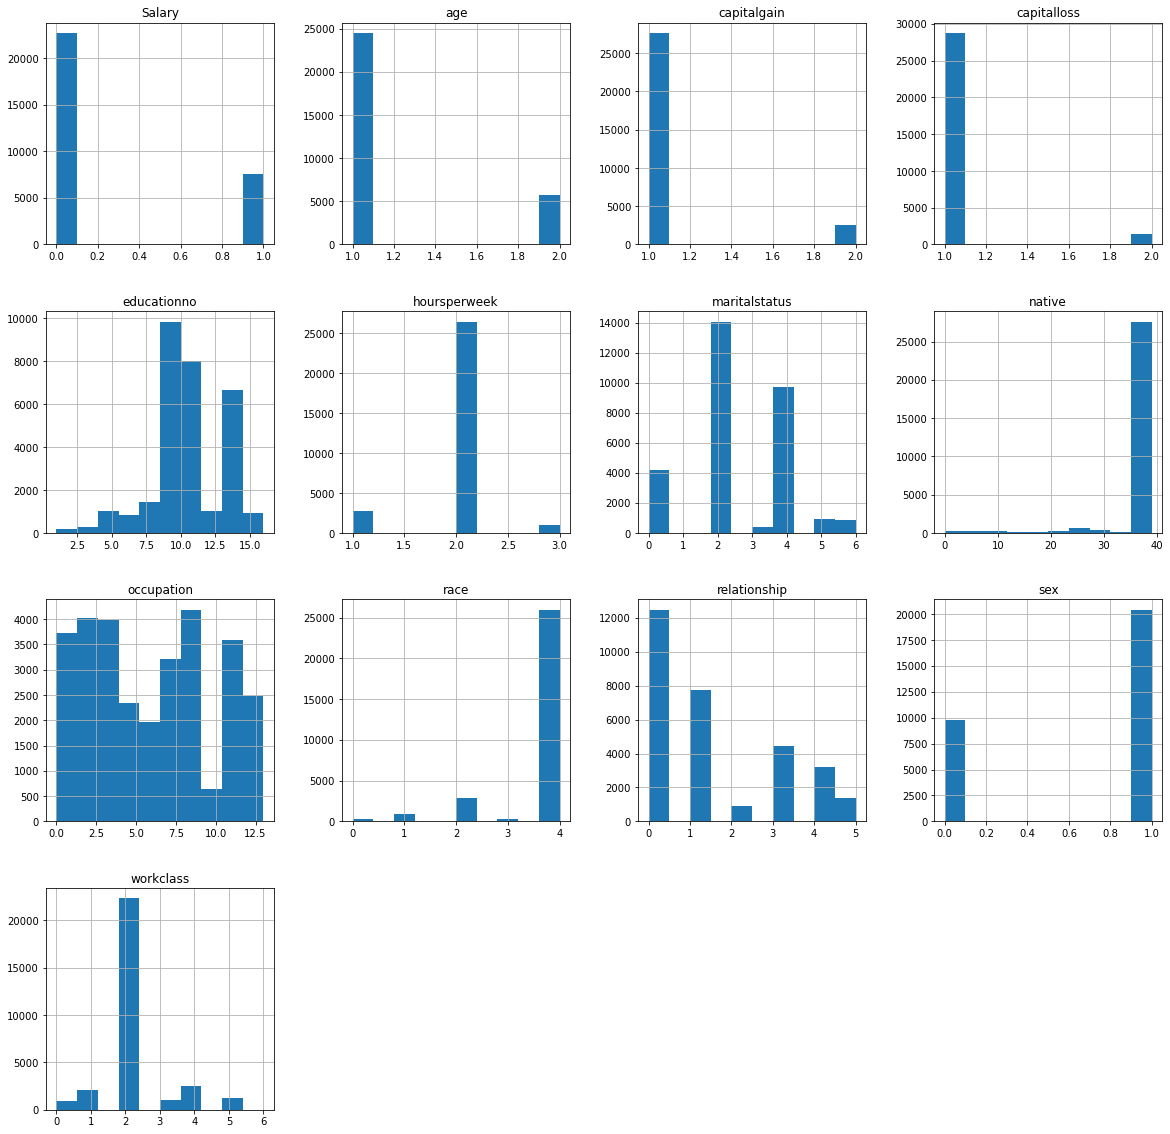

In [28]:
data_Train.hist(bins=10, figsize=(20,20))
plt.show()

In [29]:
data_Train.columns
B=['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native','Salary']

In [30]:
data_Train=data_Train[B]
data_Test=data_Test[B]

In [31]:
X_train=np.array(data_Train.iloc[:,:12])
X_test=np.array(data_Test.iloc[:,:12])
Y_train=np.array(data_Train.iloc[:,12:]).ravel()
Y_test=np.array(data_Test.iloc[:,12:]).ravel()
Y_test.shape,X_test.shape,Y_train.shape,X_train.shape

((15060,), (15060, 12), (30161,), (30161, 12))

# Model 

In [32]:
Classifier=MB()
Classifier1=GB()

In [33]:
Y_out=Classifier.fit(X_train,Y_train).predict(X_test)
Y_out1=Classifier1.fit(X_train,Y_train).predict(X_test)

# Validating accuracy

In [34]:
from sklearn.metrics import confusion_matrix
C=confusion_matrix(Y_out,Y_test)
C1=confusion_matrix(Y_out1,Y_test)
print(C)
print(C1)

[[9899 1701]
 [1461 1999]]
[[9890 1608]
 [1470 2092]]


In [35]:
print((C[0,0]+C[1,1])/C.sum())
print((C1[0,0]+C1[1,1])/C1.sum())

0.7900398406374503
0.7956175298804781


# Gaussian Naive Bayes has slight greater accuracy then Multinomial Naive Bayes

# B>Transformation of categorical variable into dummy varibles and then checking the accuracy

In [36]:
data_Train

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,1,5,13,4,0,1,4,1,2,1,2,37,0
1,1,4,13,2,3,0,4,1,1,1,1,37,0
2,1,2,9,0,5,1,4,1,1,1,2,37,0
3,2,2,7,2,5,0,2,1,1,1,2,37,0
4,1,2,13,2,9,5,2,0,1,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,1,2,12,2,12,5,4,0,1,1,2,37,0
30157,1,2,9,2,6,0,4,1,1,1,2,37,1
30158,2,2,9,6,0,4,4,0,1,1,2,37,0
30159,1,2,9,4,0,3,4,1,1,1,1,37,0


In [37]:
data_Train=pd.get_dummies(data=data_Train,columns=['age','workclass','educationno','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native'])

In [38]:
data_Test=pd.get_dummies(data=data_Test,columns=['age','workclass','educationno','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native'])

In [39]:
data_Train

,Salary,age_1,age_2,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,...,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
X_train=np.array(data_Train.iloc[:,1:])
X_test=np.array(data_Test.iloc[:,1:])
Y_train=np.array(data_Train.iloc[:,0:1]).ravel()
Y_test=np.array(data_Test.iloc[:,0:1]).ravel()
Y_test.shape,X_test.shape,Y_train.shape,X_train.shape

((15060,), (15060, 106), (30161,), (30161, 106))

# Model

In [41]:
Classifier=MB()
Classifier1=GB()

In [42]:
Y_out=Classifier.fit(X_train,Y_train).predict(X_test)
Y_out1=Classifier1.fit(X_train,Y_train).predict(X_test)

# Validation accuracy

In [43]:
from sklearn.metrics import confusion_matrix
C=confusion_matrix(Y_out,Y_test)
C1=confusion_matrix(Y_out1,Y_test)
print(C)
print(C1)

[[9282  904]
 [2078 2796]]
[[5185  274]
 [6175 3426]]


In [44]:
print((C[0,0]+C[1,1])/C.sum())
print((C1[0,0]+C1[1,1])/C1.sum())

0.80199203187251
0.5717795484727756


# conclusion

The best model is Multinomial Naive Bayes model with input features as dummy categorical variable

# Imbalance in data-set approching with naive_bayes model

Dividing the data-set with high ratio class into three segments and then merging each segment with the minority class.
Approach 
1>merge all the segments again and then train the dataset with model
2>create 3 models with three different segments and then take the mode of the results 

# Method 1

In [45]:
data_Train

,Salary,age_1,age_2,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,...,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
data_Train_min=data_Train[data_Train.Salary==1].index

In [47]:
data_Train_max=data_Train.copy()

In [48]:
data_Train_max=data_Train_max.drop(data_Train_max.index[data_Train_min],axis=0)

In [49]:
data_Train_max

,Salary,age_1,age_2,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,...,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30153,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
30155,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30156,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
data_Train_min=data_Train.loc[data_Train_min]

In [51]:
data_Train_max1=data_Train_max.iloc[0:7551,:]
data_Train_max2=data_Train_max.iloc[7551:15102,:]
data_Train_max3=data_Train_max.iloc[15102:,:]

In [52]:
data_Train_max1=data_Train_max1.append(data_Train_min)
data_Train_max2=data_Train_max2.append(data_Train_min)
data_Train_max3=data_Train_max3.append(data_Train_min)

In [53]:
data_Final=data_Train_max1.append(data_Train_max2)

In [54]:
data_Final=data_Final.append(data_Train_max3)

In [55]:
data_Final

,Salary,age_1,age_2,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,...,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30141,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30145,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30154,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
X_train=np.array(data_Final.iloc[:,1:])
Y_train=np.array(data_Final.iloc[:,0:1]).ravel()

In [57]:
Classifier=MB()
Classifier1=GB()

In [58]:
Y_out=Classifier.fit(X_train,Y_train).predict(X_test)
Y_out1=Classifier1.fit(X_train,Y_train).predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
C=confusion_matrix(Y_out,Y_test)
C1=confusion_matrix(Y_out1,Y_test)
print(C)
print(C1)

[[8381  541]
 [2979 3159]]
[[5112  272]
 [6248 3428]]


In [60]:
print((C[0,0]+C[1,1])/C.sum())
print((C1[0,0]+C1[1,1])/C1.sum())

0.7662682602921647
0.5670650730411687


# Alternative approach

In [61]:
X_train1=np.array(data_Train_max1.iloc[:,1:])
Y_train1=np.array(data_Train_max1.iloc[:,0:1]).ravel()
X_train2=np.array(data_Train_max2.iloc[:,1:])
Y_train2=np.array(data_Train_max2.iloc[:,0:1]).ravel()
X_train3=np.array(data_Train_max3.iloc[:,1:])
Y_train3=np.array(data_Train_max3.iloc[:,0:1]).ravel()
X_train1.shape,X_train2.shape,X_train3.shape,Y_train1.shape,Y_train2.shape,Y_train3.shape

((15059, 106), (15059, 106), (15059, 106), (15059,), (15059,), (15059,))

In [62]:
Classifier=MB()

In [63]:
Y_out1=Classifier.fit(X_train1,Y_train1).predict(X_test)
Classifier1=MB()
Y_out2=Classifier1.fit(X_train2,Y_train2).predict(X_test)
Classifier2=MB()
Y_out3=Classifier2.fit(X_train3,Y_train3).predict(X_test)

In [64]:
Y_out1_D=pd.DataFrame(data=Y_out1.flatten(),columns=['Y_out1'])
Y_out2_D=pd.DataFrame(data=Y_out2.flatten(),columns=['Y_out2'])
Y_out3_D=pd.DataFrame(data=Y_out3.flatten(),columns=['Y_out3'])

In [65]:
A=pd.concat([Y_out1_D,Y_out2_D,Y_out3_D],axis=1,names=['Y_out1','Y_out2','Y_out3'])
A

,Y_out1,Y_out2,Y_out3
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,0,0,0
...,...,...,...
15055,0,0,0
15056,0,0,0
15057,1,1,1
15058,0,0,0


In [66]:
B=A.mode(axis='columns',numeric_only=True)

In [67]:
from sklearn.metrics import confusion_matrix
C=confusion_matrix(B,Y_test)
C

array([[8386,  545],
       [2974, 3155]], dtype=int64)

In [68]:
print((C[0,0]+C[1,1])/C.sum())

0.7663346613545817


# Naive bayes model performs better with imbalanced data and does not require any balancing for dataset